# Lecture 13 - Introduction to Data Science

In this lecture you had a short introduction to the growing field of *Data Science* that will be useful for working with different kinds of data. 

In this tutorial we will focus on using gene expression data. In particular, we will use data from this publication [(Lee et al, 2016)](https://www.sciencedirect.com/science/article/pii/S1550413116302480) that analysed gene expression levels of liver and adipose tissue of 12 obese patients undergoing bariatric surgery.

- The RNA-seq data was initially submitted to the Gene Expression Omnibus [(GSE83322)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE83322). Here you can see more details about the sequencing protocol and obtain the raw sequencing data.
- This data is also available at the Expression Atlas [(E-GEOD-83322)](https://www.ebi.ac.uk/gxa/experiments/E-GEOD-83322/Results). A selection of post-processed and manually curated gene and protein expression datasets. 

Let's begin by loading the data and metadata tables into Pandas dataframes:

In [1]:
import pandas as pd
data = pd.read_csv('files/E-GEOD-83322-query-results.tpms.tsv', sep='\t', comment='#')
data.sample(5)

,Gene ID,Gene Name,"1008, adipose tissue","1008, liver","1011, adipose tissue","1011, liver","1036, adipose tissue","1036, liver","1038, adipose tissue","1038, liver",...,"1055, adipose tissue","1055, liver","1058, adipose tissue","1058, liver","1061, adipose tissue","1061, liver","1100, adipose tissue","1100, liver","1104, adipose tissue","1104, liver"
7224,ENSG00000137699,TRIM29,0.4,0.1,0.1,0.3,0.7,0.3,0.2,0.1,...,NaN,0.1,0.6,0.2,2.0,0.4,0.7,0.3,0.3,0.9
32666,ENSG00000279106,AC009093.7,1.0,NaN,NaN,NaN,0.8,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,3.0
12795,ENSG00000173442,EHBP1L1,51.0,10.0,90.0,18.0,64.0,10.0,33.0,14.0,...,83.0,9.0,74.0,8.0,54.0,10.0,51.0,15.0,59.0,13.0
33605,ENSG00000283849,AC092053.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5098,ENSG00000122335,SERAC1,2.0,0.7,3.0,0.9,3.0,0.9,2.0,0.4,...,3.0,0.9,4.0,1.0,1.0,1.0,3.0,0.4,2.0,1.0


Note that for convenience we are dropping (and renaming) some columns in the metadata file:

In [2]:
mdata = pd.read_csv('files/E-GEOD-83322-experiment-design.tsv', sep='\t', usecols=[1,3,13,15], header=0, names=['age', 'bmi', 'patient', 'tissue'])
mdata.sample(5)

,age,bmi,patient,tissue
14,49 year,42.4,1036,adipose tissue
15,39 year,45.4,1038,adipose tissue
9,28 year,50.1,1061,liver
16,28 year,38.1,1040,adipose tissue
5,41 year,39.0,1045,liver


## Exercise 1 - Data cleaning

### Exercise 1.1:

The metadata table contains two columns that don't have the appropriate type: 
- **age** is a string (`34 year`), but we would like to have it as a number
- the **patient** identifier was loaded as a number, but we would like to have it as a string. 

Try to fix those two issues.

In [3]:
# insert your code here...

Click to see solution below:

In [4]:
mdata['age'] = mdata['age'].apply(lambda x: int(x.split()[0]))
mdata['patient'] = mdata['patient'].apply(str)

### Exercise 1.2: 

The data table contains several `NaN` values, which most likely correspond to conditions where a transcript was not detected for the respective gene. 

It also contains entries where a transcript was mapped to different variants of the same gene (example: **ABCF2** is associated with [ENSG00000033050](https://www.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000033050) and [ENSG00000285292](https://www.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000285292). 

- Use `.fillna()` to replace `NaN` with zeros.
- Use `.groupby()` and `.agg()` to add up the expression levels for different variants of the same gene.

> Tip: use `as_index=False` with `groupby`

In [5]:
# insert your code here...

Click to see solution below:

In [6]:
data.fillna(0, inplace=True) # alternative: data = data.fillna(0)

data = data.groupby('Gene Name', as_index=False).agg(sum)

### Exercise 1.3:

The column identifiers in the data table contain the patient number and the sampled tissue. This makes it harder to group samples by either patient or tissue. 

- Use `.melt()` to unpivot the table to long-format.
- Create two new columns (patient, tissue) by splitting the original identifiers.
- Finally, delete the old column.

In [7]:
# insert your code here...

Click to see solution below:

In [8]:
data = data.melt(id_vars='Gene Name', var_name='sample')
data['individual'] = data['sample'].apply(lambda x: x.split(', ')[0])
data['tissue'] = data['sample'].apply(lambda x: x.split(', ')[1])
data.drop(columns={'sample'}, inplace=True)

In [9]:
data

,Gene Name,value,individual,tissue
0,A1BG,0.3,1008,adipose tissue
1,A1BG-AS1,1.0,1008,adipose tissue
2,A1CF,0.0,1008,adipose tissue
3,A2M,590.0,1008,adipose tissue
4,A2M-AS1,8.0,1008,adipose tissue
...,...,...,...,...
817243,ZXDC,12.0,1104,liver
817244,ZYG11A,0.9,1104,liver
817245,ZYG11B,17.0,1104,liver
817246,ZYX,28.0,1104,liver


In [10]:
len(set(data['Gene Name']))

34052

<AxesSubplot:>

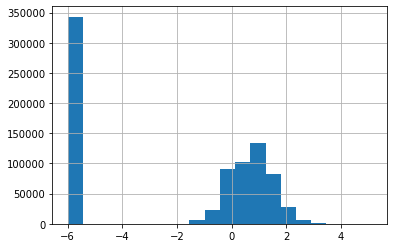

In [37]:
import numpy as np

np.log10(data['value'] + 1e-6).hist(bins=20)

In [19]:
np.log10(0.1)

-1.0